In [3]:
import pandas as pd

In [31]:
df = pd.read_csv("../dat/fixed_model_results.csv")
df.head(30)

,Iteration,Classes_Dep_Var,Num_Ind_Vars,Num_Categorical_Vars,Classes_Ind_Vars,Sample_Size,Model,Hyperparameter_1,Hyperparameter_2,Hyperparameter_3,Misclassification,Accuracy,Precision,Recall,F1_Score
0,1,2,3,0,2,100,LogisticRegression,logit,NaN,NaN,0.133333,0.866667,0.866667,0.866667,0.866667
1,1,2,3,0,2,100,LogisticRegression,probit,NaN,NaN,0.133333,0.866667,0.866667,0.866667,0.866667
2,1,2,3,0,2,100,DecisionTree,entropy,0.05,0.1,0.266667,0.733333,0.737557,0.733333,0.732143
3,1,2,3,0,2,100,DecisionTree,entropy,0.05,0.2,0.266667,0.733333,0.737557,0.733333,0.732143
4,1,2,3,0,2,100,DecisionTree,entropy,0.10,0.1,0.266667,0.733333,0.737557,0.733333,0.732143
5,1,2,3,0,2,100,DecisionTree,entropy,0.10,0.2,0.266667,0.733333,0.737557,0.733333,0.732143
6,1,2,3,0,2,100,DecisionTree,gini,0.05,0.1,0.266667,0.733333,0.737557,0.733333,0.732143
7,1,2,3,0,2,100,DecisionTree,gini,0.05,0.2,0.266667,0.733333,0.737557,0.733333,0.732143
8,1,2,3,0,2,100,DecisionTree,gini,0.10,0.1,0.266667,0.733333,0.737557,0.733333,0.732143
9,1,2,3,0,2,100,DecisionTree,gini,0.10,0.2,0.266667,0.733333,0.737557,0.733333,0.732143


In [9]:
df_LR = df[df["Model"] == "LogisticRegression"]
print(df_LR[df_LR["Hyperparameter_1"] == "logit"][["Misclassification"]].mean())
print(df_LR[df_LR["Hyperparameter_1"] == "probit"][["Misclassification"]].mean())

Misclassification    0.311754
dtype: float64
Misclassification    0.311741
dtype: float64


logit seems very slightly better, so use that going forward

In [10]:
error_LR = df_LR[df_LR["Hyperparameter_1"] == "logit"][["Misclassification"]].mean()

In [11]:
df_DT = df[df["Model"] == "DecisionTree"]
df_DT.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'})

Misclassification
Hyperparameter_1 Hyperparameter_2 Hyperparameter_3                   
entropy          0.05             0.1                        0.402119
                                  0.2                        0.402119
                 0.10             0.1                        0.395571
                                  0.2                        0.395571
f_test           0.05             0.1                        0.521540
                                  0.2                        0.521540
                 0.10             0.1                        0.532961
                                  0.2                        0.532961
gini             0.05             0.1                        0.403436
                                  0.2                        0.403436
                 0.10             0.1                        0.395369
                                  0.2                        0.395369

Here it looks like gini, 0.10, and 0.1 looks the best, so use that going forward:

In [12]:
error_DT = df_DT.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'}).min()

In [13]:
df_RF = df[df["Model"] == "RandomForest"]
error_RF = df_RF.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'}).min()

In [14]:
df_ANN = df[df["Model"] == "ANN"]
error_ANN = df_ANN.groupby(['Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3']).agg({'Misclassification': 'mean'}).min()
print(error_ANN)

Misclassification    0.331704
dtype: float64


### Results I need for Fig. 2 of Kim (2010): Interaction plot of CL_Y and M for continuous independent variables

In [29]:
df_LR_cont = df_LR[df_LR["Num_Categorical_Vars"] == 0]
temp = df_LR_cont.groupby(['Classes_Dep_Var', 'Hyperparameter_1'])['Misclassification'].mean()
errors_LR_cont = temp.groupby('Classes_Dep_Var').min()
errors_LR_cont

Classes_Dep_Var
2    0.211500
3    0.354583
4    0.502639
Name: Misclassification, dtype: float64

In [16]:
df_DT_cont = df_DT[df_DT["Num_Categorical_Vars"] == 0]
temp = df_DT.groupby(['Classes_Dep_Var', 'Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3'])['Misclassification'].mean()
errors_DT_cont = temp.groupby('Classes_Dep_Var').min()
errors_DT_cont

Classes_Dep_Var
2    0.260985
3    0.399281
4    0.524269
Name: Misclassification, dtype: float64

In [17]:
df_ANN_cont = df_ANN[df_ANN["Num_Categorical_Vars"] == 0]
temp = df_ANN.groupby(['Classes_Dep_Var', 'Hyperparameter_1', 'Hyperparameter_2', 'Hyperparameter_3'])['Misclassification'].mean()
errors_ANN_cont = temp.groupby('Classes_Dep_Var').min()
errors_ANN_cont

Classes_Dep_Var
2    0.196682
3    0.332367
4    0.456852
Name: Misclassification, dtype: float64

### Now actually plot this

In [18]:
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import rgb

In [19]:
# Update global settings with JMLR base and your customizations
plt.rcParams.update(bundles.jmlr2001())
# Additional customizations for 12 pt font
plt.rcParams.update({"font.size": 12})

In [20]:
errors_LR_cont.values

array([0.2115    , 0.35458333, 0.50263889])

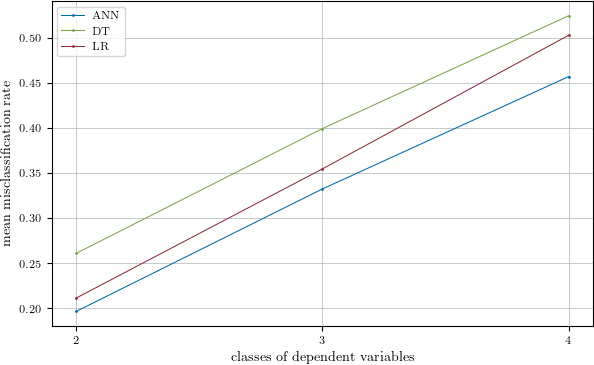

In [21]:
fig,ax = plt.subplots()
ax.plot(errors_ANN_cont.index, errors_ANN_cont.values, '.-', ms=2, lw=0.75, color=rgb.tue_blue, label="ANN")
ax.plot(errors_DT_cont.index, errors_DT_cont.values, '.-', ms=2, lw=0.75, color=rgb.tue_green, label="DT")
ax.plot(errors_LR_cont.index, errors_LR_cont.values, '.-', ms=2, lw=0.75, color=rgb.tue_red, label="LR")
ax.set_xlabel("classes of dependent variables")
ax.set_ylabel("mean misclassification rate")
ax.legend(loc="upper left")

ax.set_xticks([2, 3, 4])
ax.grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
# ax.xaxis.set_major_locator(plt.MultipleLocator(10))
# ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
# # ax.set_yscale("log")
# ax.set_xlim([-2, 102])
# ax.axhline(0, color=rgb.tue_dark, linewidth=0.5)
# 
# ax.grid(axis="both", which="major", color=rgb.tue_dark, linewidth=0.5)
# ax.grid(axis="both", which="minor", color=rgb.tue_gray, linewidth=0.5)
# 
fig.savefig("../doc/fig/02_interaction_cly_m_cont.pdf")
plt.show()

now add the values from the original study with help of perplexity

In [33]:
data = {
    'CL_Y': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
             3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
             4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    'V': [3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7],
    'S': [100, 500, 1000, 10000] * 9,
    'ANN': [0.2267, 0.2667, 0.2067, 0.2170, 0.2667, 0.2367, 0.2467, 0.2110, 0.2666, 0.2700, 0.2067, 0.2060,
            0.2600, 0.3667, 0.3000, 0.3287, 0.2000, 0.3733, 0.3253, 0.3373, 0.1667, 0.3933, 0.3200, 0.3373,
            0.3467, 0.4000, 0.4567, 0.4803, 0.4000, 0.4867, 0.5133, 0.4443, 0.4333, 0.5267, 0.4767, 0.4633],
    'DT': [0.2333, 0.3000, 0.2167, 0.2357, 0.2777, 0.2333, 0.2487, 0.2540, 0.2555, 0.2300, 0.3200, 0.2540,
           0.3867, 0.4333, 0.3998, 0.3933, 0.4000, 0.4467, 0.3910, 0.4493, 0.2667, 0.4933, 0.3544, 0.4493,
           0.4467, 0.4667, 0.4999, 0.5280, 0.5000, 0.5600, 0.5355, 0.5527, 0.5000, 0.5867, 0.5103, 0.5597],
    'LR': [0.2000, 0.2000, 0.2170, 0.2170, 0.1800, 0.1800, 0.2060, 0.2060, 0.1667, 0.1667, 0.2060, 0.2060,
           0.2267, 0.3333, 0.3267, 0.3323, 0.2333, 0.3800, 0.3220, 0.3410, 0.1667, 0.5200, 0.3300, 0.3410,
           0.3733, 0.4333, 0.4899, 0.4899, 0.4000, 0.5067, 0.4657, 0.4657, 0.4333, 0.5200, 0.4900, 0.4900]
}

df_orig = pd.DataFrame(data)
df_orig

,CL_Y,V,S,ANN,DT,LR
0,2,3,100,0.2267,0.2333,0.2000
1,2,3,500,0.2667,0.3000,0.2000
2,2,3,1000,0.2067,0.2167,0.2170
3,2,3,10000,0.2170,0.2357,0.2170
4,2,5,100,0.2667,0.2777,0.1800
5,2,5,500,0.2367,0.2333,0.1800
6,2,5,1000,0.2467,0.2487,0.2060
7,2,5,10000,0.2110,0.2540,0.2060
8,2,7,100,0.2666,0.2555,0.1667
9,2,7,500,0.2700,0.2300,0.1667


In [34]:
errors_orig = df_orig.groupby(['CL_Y'])[['ANN', 'DT', 'LR']].mean()

In [35]:
errors_orig[['ANN']].values

array([[0.235625  ],
       [0.30905   ],
       [0.45233333]])

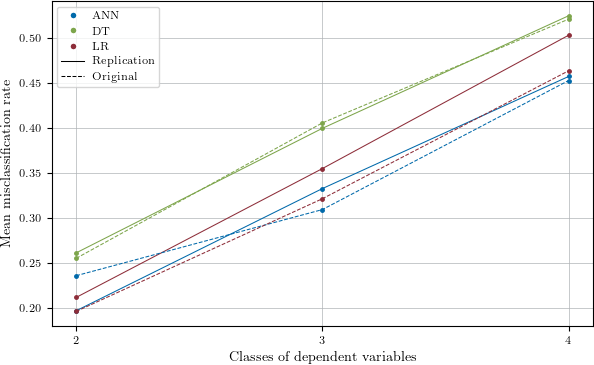

In [37]:
fig, ax = plt.subplots()

# Plot the data
ax.plot(errors_ANN_cont.index, errors_ANN_cont.values, '.-', ms=5, lw=0.75, color=rgb.tue_blue, label=None)
ax.plot(errors_DT_cont.index, errors_DT_cont.values, '.-', ms=5, lw=0.75, color=rgb.tue_green, label=None)
ax.plot(errors_LR_cont.index, errors_LR_cont.values, '.-', ms=5, lw=0.75, color=rgb.tue_red, label=None)
ax.plot(errors_orig[['ANN']].index, errors_orig[['ANN']].values, '.--', ms=5, lw=0.75, color=rgb.tue_blue, label=None)
ax.plot(errors_orig[['DT']].index, errors_orig[['DT']].values, '.--', ms=5, lw=0.75, color=rgb.tue_green, label=None)
ax.plot(errors_orig[['LR']].index, errors_orig[['LR']].values, '.--', ms=5, lw=0.75, color=rgb.tue_red, label=None)

# Add labels and grid
ax.set_xlabel("Classes of dependent variables")
ax.set_ylabel("Mean misclassification rate")
ax.set_xticks([2, 3, 4])
ax.grid(axis="both", color=rgb.tue_gray, linewidth=0.5)

# Custom legend
dot_ANN = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_blue, markersize=5, label="ANN")
dot_DT = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_green, markersize=5, label="DT")
dot_LR = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=rgb.tue_red, markersize=5, label="LR")
line_replication = plt.Line2D([0], [1], linestyle='-', color='k', linewidth=0.75, label="Replication")
line_original = plt.Line2D([0], [1], linestyle='--', color='k', linewidth=0.75, label="Original")

ax.legend(handles=[dot_ANN, dot_DT, dot_LR, line_replication, line_original], loc="upper left")

# Save and show
fig.savefig("../doc/fig/02_interaction_cly_m_cont.pdf")
plt.show()